In [65]:
import requests, re, nltk
from bs4 import BeautifulSoup
from nltk import clean_html
from collections import Counter
import operator

stop_words = nltk.corpus.stopwords.words('english') + ['ut', '\'re','.', ',', '--', '\'s', '?', ')', '(', ':', '\'','\"', '-', '}', '{', '&', '|', u'\u2014' ]
def cleanHtml (html):
    from bs4 import BeautifulSoup
    soup = BeautifulSoup(html, 'html.parser')
    return soup .get_text()

def cleanGutenberg (text):
    x = re.search("***", text)
    print(x.start())

def cleanWord (w):
    wn = re.sub('[,"\.\'&\|:@>*;/=]', "", w)
    return re.sub('^[0-9\.]*$', "", wn)
       
def get_wf (URL):
    r = requests .get(URL)
    t = cleanHtml (r .text) .lower()
    wds = re .split('\s+',t)
    for i in range(len(wds)):
        wds [i] = cleanWord (wds [i])
    wf = Counter (wds)
    for k in stop_words:
        wf. pop(k, None)
    tw = 0
    for w in wf:
       tw += wf[w] 
    wfs = sorted (wf .items(), key = operator.itemgetter(1), reverse=True)
    ml = min(len(wfs),15)
    return (wfs [ 0:ml ] [::-1], tw)
           
(wf_gg, tw_gg) = get_wf('https://www.gutenberg.org/cache/epub/526/pg526.txt')
(wf_hod, tw_hod) = get_wf('https://www.gutenberg.org/cache/epub/64317/pg64317.txt')
(wf_lj, tw_lj) = get_wf('https://www.gutenberg.org/cache/epub/5658/pg5658.txt')

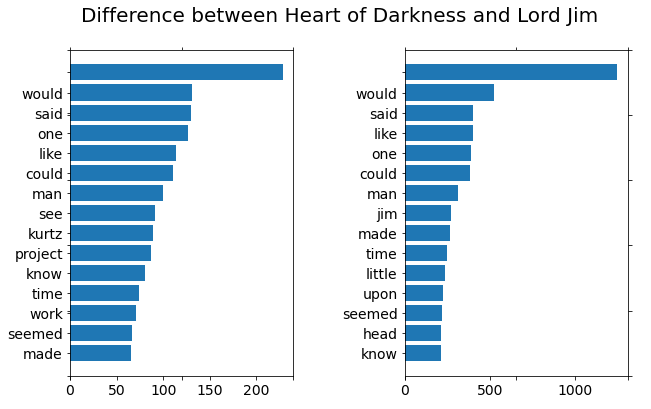

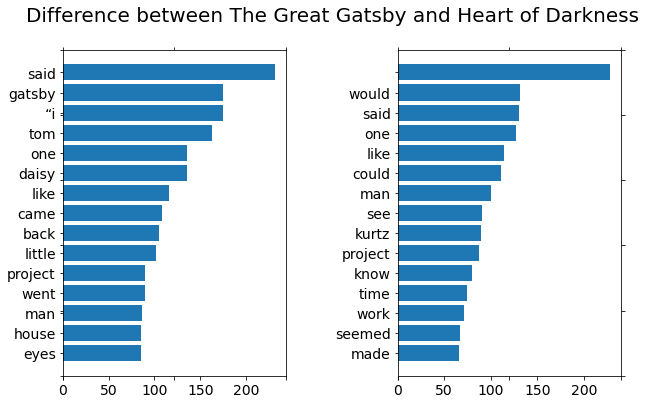

In [69]:
import numpy as np
import pylab
import matplotlib.pyplot as plt

%matplotlib inline
def plotTwoLists (wf_ee, wf_bu, title):
    f = plt.figure (figsize=(10, 6))
    f .suptitle (title, fontsize=20)
    ax = f.add_subplot(111)
    ax .spines ['top'] .set_color ('none')
    ax .spines ['bottom'] .set_color ('none')
    ax .spines ['left'] .set_color ('none')
    ax .spines ['right'] .set_color ('none')
    ax .tick_params (labelcolor='w', top='off', bottom='off', left='off', right='off', labelsize=20)
    ax1 = f .add_subplot (121)
    plt .subplots_adjust (wspace=.5)

    pos = np .arange (len(wf_ee)) 
    ax1 .tick_params (axis='both', which='major', labelsize=14)
    pylab .yticks (pos, [ x [0] for x in wf_ee ])
    ax1 .barh (range(len(wf_ee)), [ x [1] for x in wf_ee ], align='center')

    ax2 = f .add_subplot (122)
    ax2 .tick_params (axis='both', which='major', labelsize=14)
    pos = np .arange (len(wf_bu)) 
    pylab .yticks (pos, [ x [0] for x in wf_bu ])
    ax2 .barh (range (len(wf_bu)), [ x [1] for x in wf_bu ], align='center')

plotTwoLists (wf_gg, wf_lj, 'Difference between Heart of Darkness and Lord Jim')
plotTwoLists (wf_hod, wf_gg, 'Difference between The Great Gatsby and Heart of Darkness')

# Analysis
The purpose of this was to analyze two works written in similar time periods but different locations, one written in America and the other written in Europe.
When comparing Joseph Conrad's work to themselves it is easy to see the similarities between how they were written.
The top 6 words had about the same frequence and ranking in the charts.
One of the major character's name was 8th for Heart of Darkness and 7th for Lord Jim.

Both Joseph Conrad and F. Scott Fitzgerald used the words "said", "one", and "like" around the same amount and many times. 
Two characters were mentioned lots of times in the Great Gatsby, but only one was mention in the Heart of Darkness. The Great Gatsby focuses on traveling as seen by the use of words "came" and "went". Another interesting observation is that the word "see" showed up in the Heart of Darkness and the word "eyes" in the Great Gatsby. This means that Conrad described what characters saw around them and Fitzgerald focused on the character's eyes.